In [1]:
import re
from collections import Counter
from os import listdir
from os.path import isfile, join

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def getCsiMatrFromCsv(fileName: str, CsiFilesFolder: str) -> pd.DataFrame:
    csvFilePath = join(CsiFilesFolder, fileName)
    return pd.read_csv(csvFilePath)


def upload2Dataset(csi_dict: {str: pd.DataFrame}, csi_cvs_folder: str = "dataset", csvFileName: str = ""):
    # fileName == "fileName.csv"
    csi_cvs_folder = csi_cvs_folder
    if isinstance(csi_dict, pd.DataFrame):
        csi_dict.to_csv(join(csi_cvs_folder, csvFileName), index=False)
        return

    for fileName in csi_dict:
        csvFileName = fileName[:-3] + "csv"
        csi_dict[fileName].to_csv(join(csi_cvs_folder, csvFileName), index=False)

def getCsiDictFromDataset(dataset_folder: str = "dataset") -> {str: pd.DataFrame}:
    csi_dict: {str: pd.DataFrame} = dict()
    csiFiles = [fileName for fileName in listdir(dataset_folder) if isfile(join(dataset_folder, fileName))]
    for idx, fileName in enumerate(csiFiles):
        csi_matrix = getCsiMatrFromCsv(fileName, dataset_folder)
        # csi_matrix.head(2)
        csi_dict[fileName] = csi_matrix
    return csi_dict

In [3]:
filesLen = pd.DataFrame(columns=["FileName", "FileLen"])
dataset_folder = "dataset1"
csiFiles = [fileName for fileName in listdir(dataset_folder) if isfile(join(dataset_folder, fileName))]
csi_dict: {str: pd.DataFrame}
csi_dict = getCsiDictFromDataset(dataset_folder=dataset_folder)
for idx, fileName in enumerate(csi_dict):
    csi_matrix = csi_dict[fileName]
    # csi_matrix.head(2)
    filesLen.loc[idx] = [fileName, csi_matrix.shape[0]]

### Dot plot of files lengths

In [4]:
binsHeight, intervals = np.histogram(filesLen.FileLen.values, bins=500)

In [5]:
binsHeight

array([ 1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
        1,  1,  0,  0,  4,  3,  0,  4,  5,  4,  0,  2,  1,  1,  0,  1,  3,
        0,  0,  2,  1,  0,  0,  1,  0,  0,  1,  0,  0,  1,  0,  1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0

In [6]:
y = []
step = 1
for i in binsHeight:
    for j in range(i):
        y.append((j+1) * step)

filesLen = filesLen.sort_values("FileLen")
filesLen["Count"] = y

In [7]:
filesLen = filesLen.sort_values("FileName")
filesLen

FileName  FileLen  Count
0       brushteeth_1591629383.csv       61      1
1       brushteeth_1591629387.csv      332      1
2       brushteeth_1591629391.csv      340     15
3       brushteeth_1591629396.csv      340     10
4       brushteeth_1591629400.csv      337      7
..                            ...      ...    ...
328  washingdishes_1591627895.csv      338      1
329  washingdishes_1591627899.csv      345      1
330  washingdishes_1591627903.csv      342      1
331  washingdishes_1591627907.csv      337     11
332  washingdishes_1591627912.csv      338     11

[333 rows x 3 columns]

In [8]:
# actionsType = {"Falldown": "■",
#                "Hand_circle": "▲",
#                "Hand_move_up": "●",
#                "Nothing": "◆",
#                "Smoking": "▼",
#                "Walking_along": "♥",
#                "Walking_perpendicular":"♠"
#                }
actionsType = set(map(lambda fileName: re.sub(r"_\d{1,10}.csv", "", fileName), csi_dict.keys()))

for idx in filesLen.index.values:
    fileName = filesLen.iloc[idx,0]
    for actT in actionsType:
        if actT in fileName:
            filesLen.iloc[idx,0] = actT


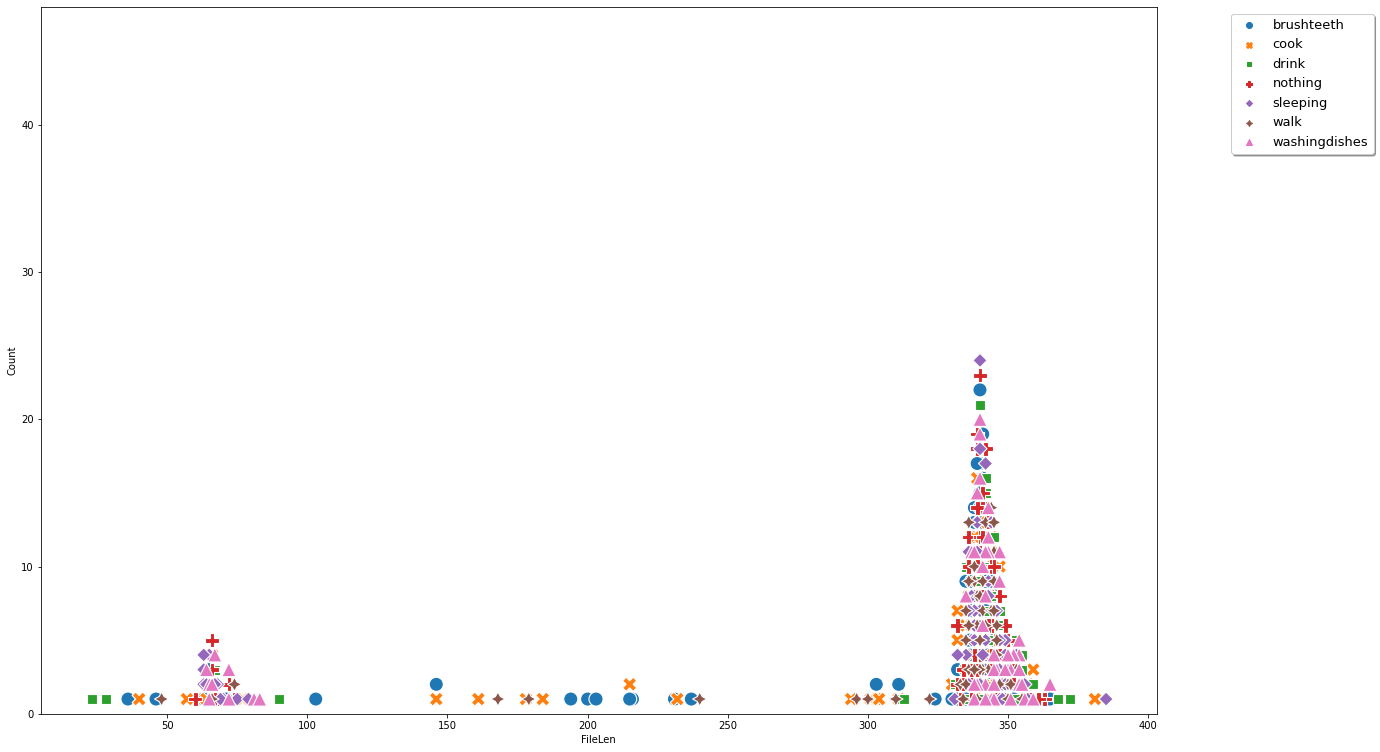

In [9]:
# '■', '▲', '●', '◆', '▼', '♥', '♠'
# "□", "△", "○", "◊", "▽", "☆", "☖"
# signs = []

maxSignsNumb = max(binsHeight)
# for actT in actionsType:
#     signsNumb = len(list(filter(lambda x: actT in x, filesLen.FileName)))
#     if signsNumb > maxSignsNumb:
#         maxSignsNumb = signsNumb
    # signs += [actionsType[actT], ] * signsNumb


plt.figure(figsize=(20, 13))
plt.ylim((-0.002, 2*step*maxSignsNumb))
# sns.histplot(data=filesLen, x="FileLen", bins=intervals)
scatter = sns.scatterplot(data=filesLen, x="FileLen", y="Count", hue="FileName", style="FileName", s=200)
scatter.legend(fontsize=13,
               bbox_to_anchor=(1.2, 1),
               shadow=True,
               facecolor='white');
plt.savefig(f"pictures/{dataset_folder}/dataset_dot-plot.jpg", bbox_inches="tight")

In [10]:
filesLen

FileName  FileLen  Count
0       brushteeth       61      1
1       brushteeth      332      1
2       brushteeth      340     15
3       brushteeth      340     10
4       brushteeth      337      7
..             ...      ...    ...
328  washingdishes      338      1
329  washingdishes      345      1
330  washingdishes      342      1
331  washingdishes      337     11
332  washingdishes      338     11

[333 rows x 3 columns]

### Correlation matrix for first packet of each file

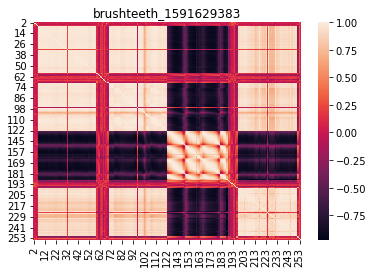

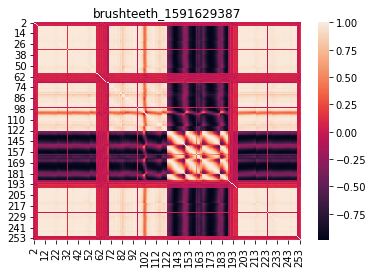

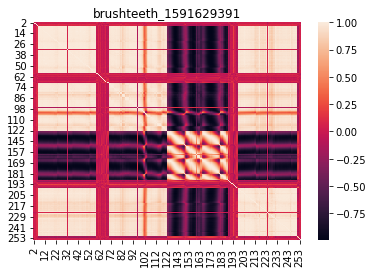

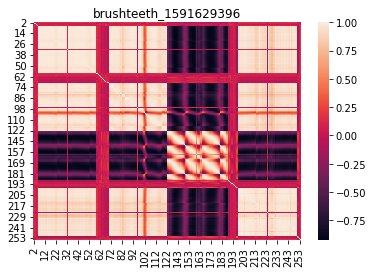

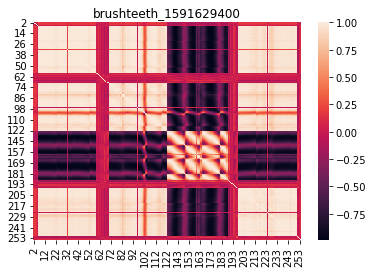

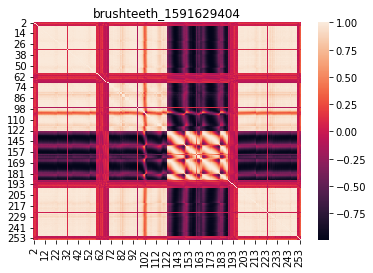

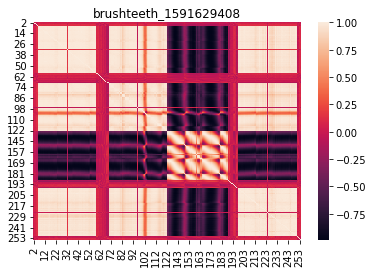

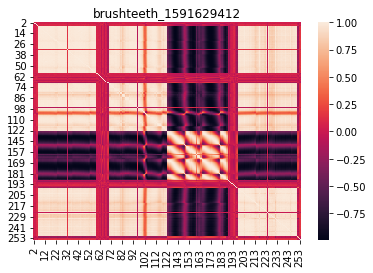

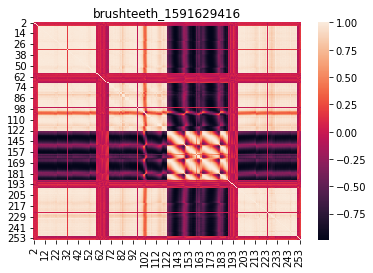

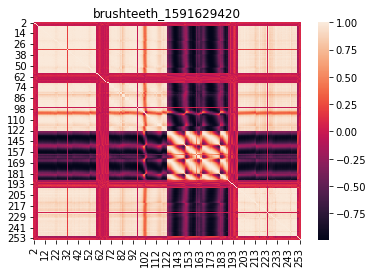

In [11]:
for idx, fileName in enumerate(csi_dict):
    csi_matrix = csi_dict[fileName]
    packet = csi_matrix.iloc[0]
    plt.title(fileName[:-4])
    sns.heatmap(csi_matrix.corr())
    plt.savefig(f"pictures/{dataset_folder}/files_correlation/dataset_correlation-matrix_{fileName[:-4]}.jpg", bbox_inches="tight")
    if idx < 10:
        plt.show()
    else:
        # plt.clf()
        plt.close()

### plot of one packet

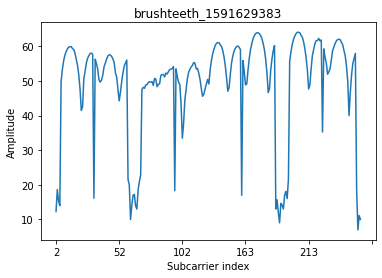

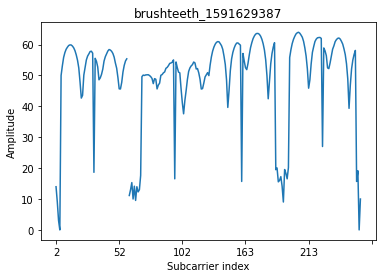

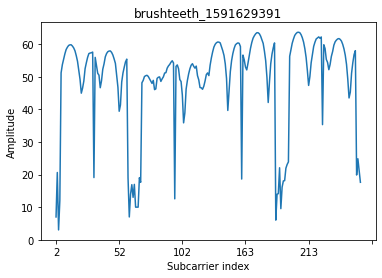

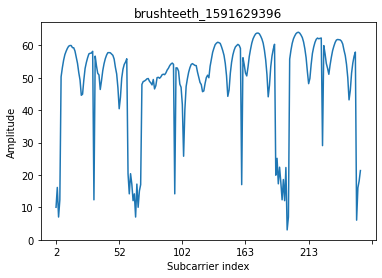

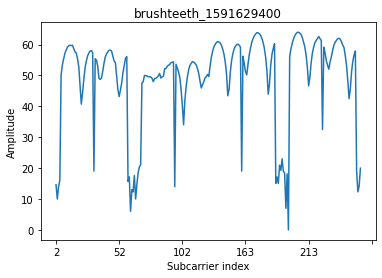

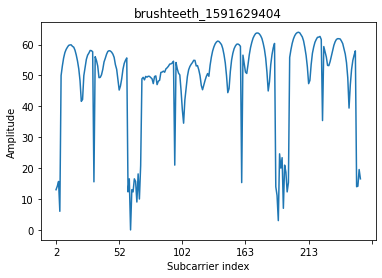

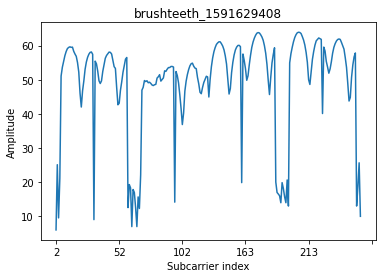

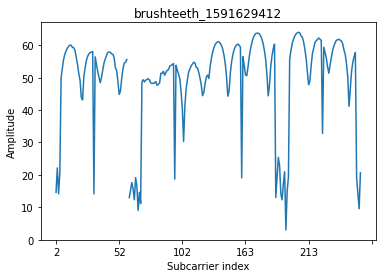

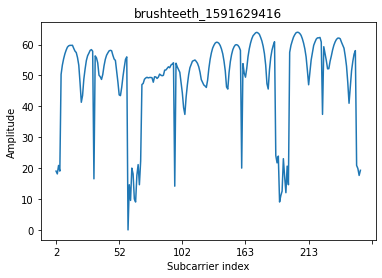

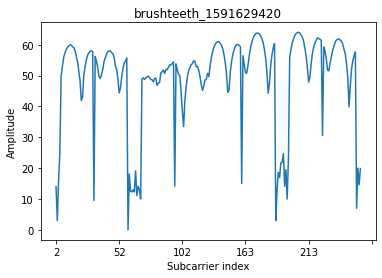

In [17]:
for idx, fileName in enumerate(csi_dict):
    csi_matrix = csi_dict[fileName]
    packet = csi_matrix.iloc[0]
    packet.plot.line()
    plt.title(fileName[:-4])
    plt.xlabel("Subcarrier index")
    plt.ylabel("Amplitude")
    plt.savefig(f"pictures/{dataset_folder}/files_packet_plot/dataset_packet_plot_{fileName[:-4]}.jpg", bbox_inches="tight")
    if idx < 10:
        plt.show()
    else:
        # plt.clf()
        plt.close()


### file heatmap

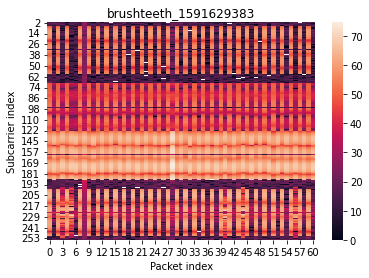

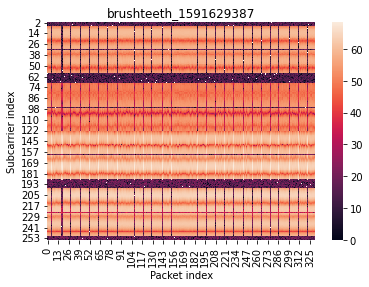

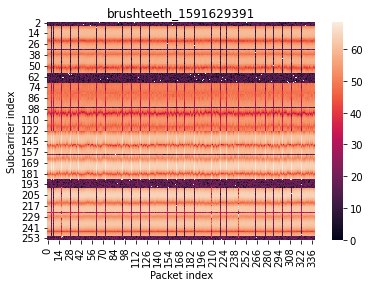

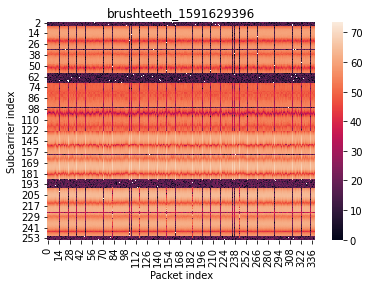

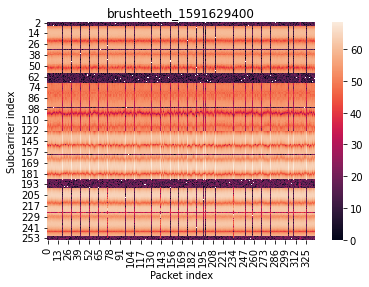

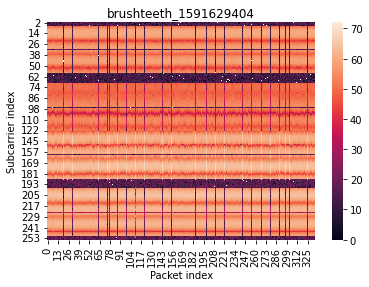

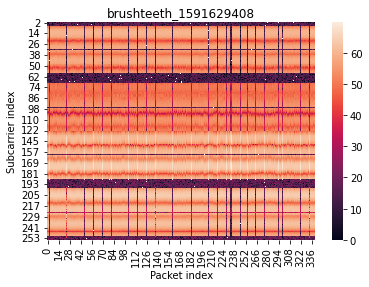

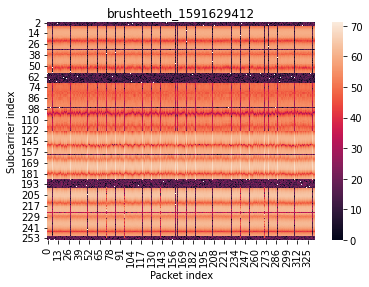

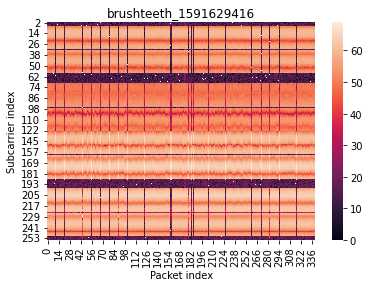

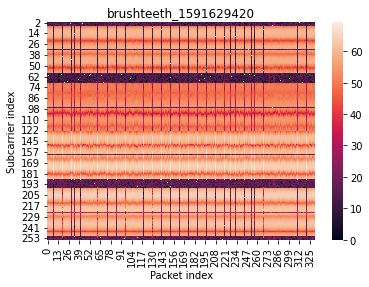

In [18]:
for idx, fileName in enumerate(csi_dict):
    csi_matrix = csi_dict[fileName]
    plt.title(fileName[:-4])
    sns.heatmap(csi_matrix.T, vmin=0, vmax=csi_matrix.values.max())
    plt.ylabel("Subcarrier index")
    plt.xlabel("Packet index")
    plt.savefig(f"pictures/{dataset_folder}/files_heatmap/dataset_heatmap_{fileName[:-4]}.jpg", bbox_inches="tight")
    if idx < 10:
        plt.show()
    else:
        # plt.clf()
        plt.close()

### line plot of one(150-th) subcarriers

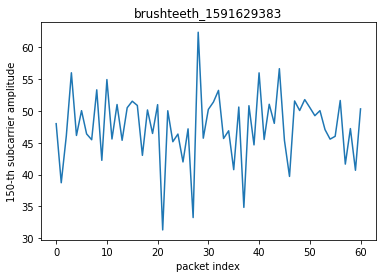

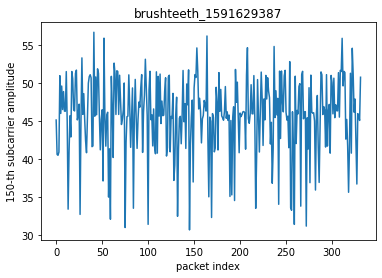

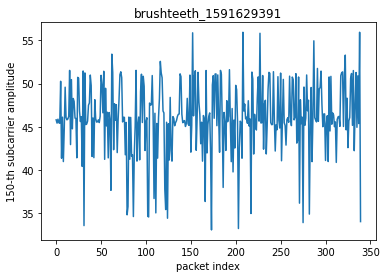

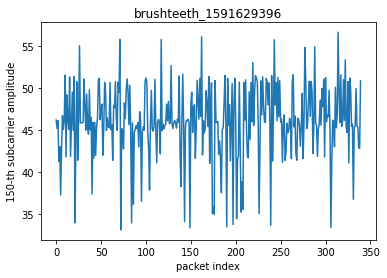

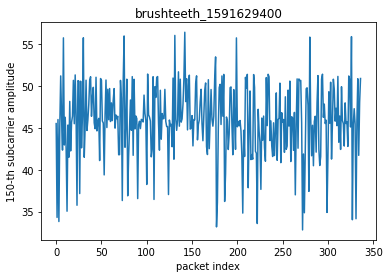

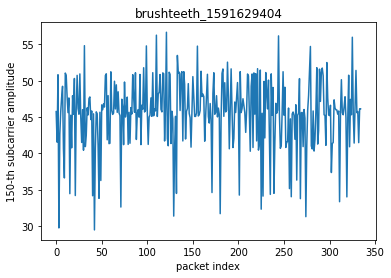

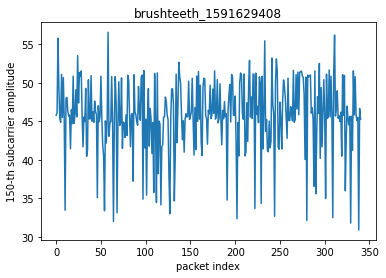

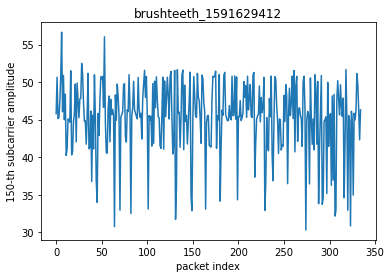

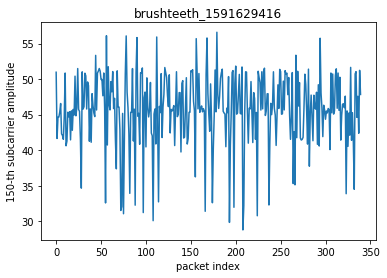

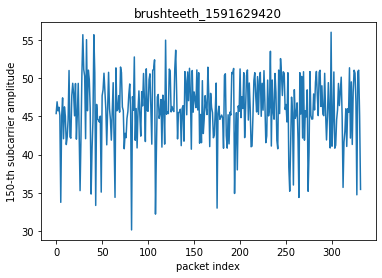

In [19]:
subcarrierIdx = 150
for idx, fileName in enumerate(csi_dict):
    csi_matrix = csi_dict[fileName]
    csi_matrix[str(subcarrierIdx)].plot.line()
    plt.title(fileName[:-4])
    plt.ylabel(f"{subcarrierIdx}-th subcarrier amplitude")
    plt.xlabel("packet index")
    plt.savefig(f"pictures/{dataset_folder}/files_line-plot_one_subcarrier/dataset_line-plot_{fileName[:-4]}.jpg", bbox_inches="tight")
    if idx < 10:
        plt.show()
    else:
        # plt.clf()
        plt.close()

### line plot of 10 subcarriers

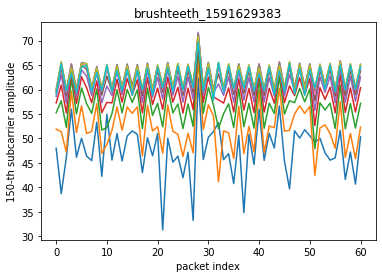

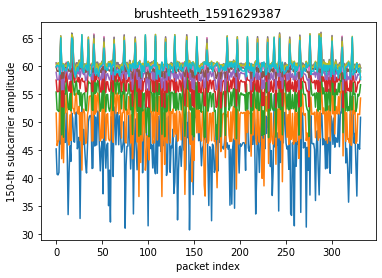

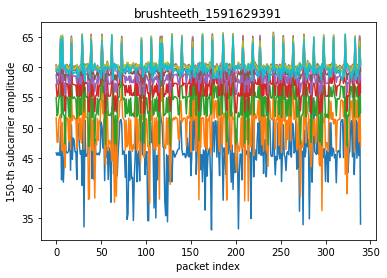

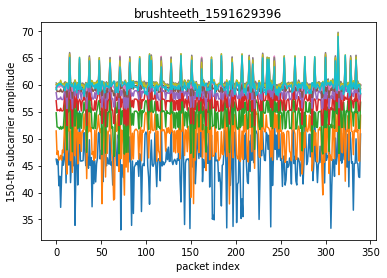

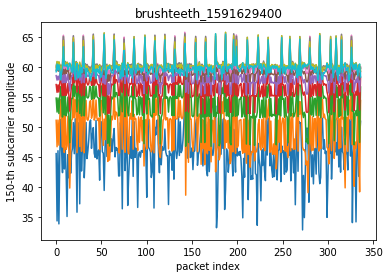

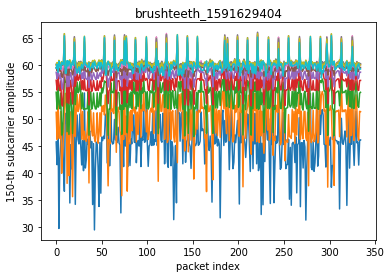

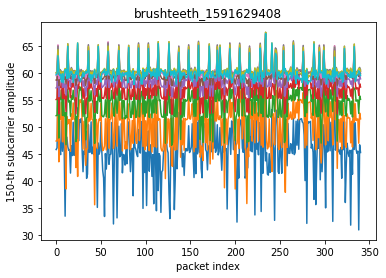

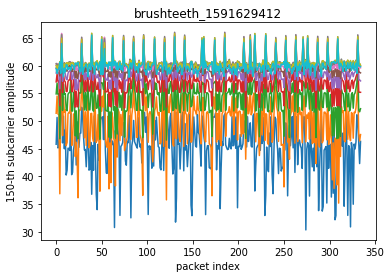

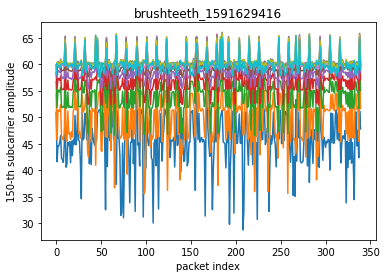

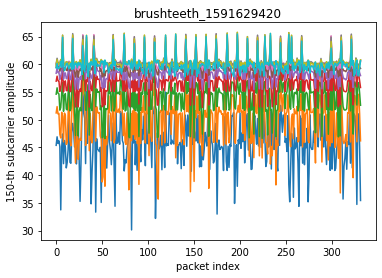

In [22]:
subcarrierIdxs = range(150, 160)
for idx1, fileName in enumerate(csi_dict):
    csi_matrix = csi_dict[fileName]
    for idx in subcarrierIdxs:
        csi_matrix[str(idx)].plot.line()
    plt.title(fileName[:-4])
    plt.ylabel(f"{subcarrierIdx}-th subcarrier amplitude")
    plt.xlabel("packet index")
    plt.savefig(f"pictures/{dataset_folder}/files_line-plot_ten_subcarrier/dataset_line-plot_{fileName[:-4]}.jpg", bbox_inches="tight")
    if idx1 < 10:
        plt.show()
    else:
        # plt.clf()
        plt.close()